In [1]:
#imports
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_bloch_multivector

import math

## Demo:  Qiskit - creating circuits
To create a circuit in qiskit with 1 qubit do:

In [2]:
qc = QuantumCircuit(1)

To apply gates you can do things like this:

In [3]:
qc.x(__) #apply x gate on qubit 0 (first and only)
qc.__(0) #apply h gate

qc.rx(__, __) #apply rx rotation of pi/2 

##### visualising circuits
You can get a circuit diagram like so:

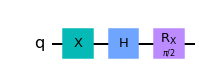

In [4]:
qc.draw(output='mpl')

Or you can see it on the bloch sphere

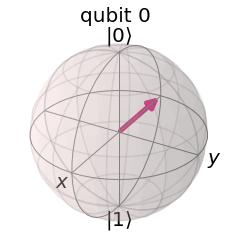

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

Personally, I prefer the following representation which scales better with more qubits and presents superpositions more intuitively. However, rotations are more intuitive on the bloch sphere

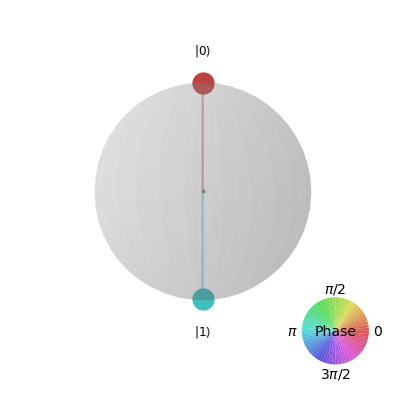

In [6]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

(The size of the balls is their amplitude and the colour of the balls is their phase)

##### running a circuit
We're going to examine the effects of measuring the + state:

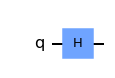

In [7]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

First, We need to measure our circuit at the end. To do that we need to have a classical register to store the results in:

In [8]:
from qiskit import ClassicalRegister
c_reg = ClassicalRegister(1)
qc.___(c_reg)

Then we need to tell qiskit to measure qubit 0 into bit 0 at the end of the circuit

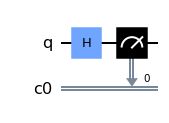

In [9]:
qc.measure(___)
qc.draw(output='mpl')

Finally, we can run it. All we have to do is choose what device or *backend* to run it on (we'll be using a simulator for now) and then execute it a given number of times

In [10]:
from qiskit import BasicAer, execute
backend = BasicAer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1000).result()
results.get_counts()

{'1': 505, '0': 495}

Roughly half the time, not bad!
We can also visulise the results a bit better in a histogram (which is pretty much vital for larger numbers of qubits)

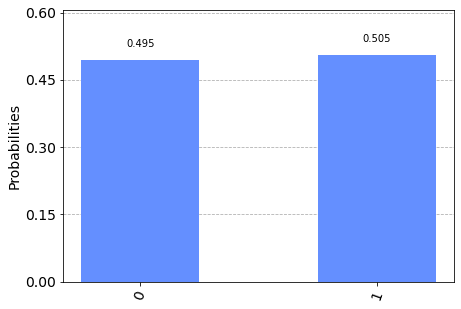

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(results.get_counts())

#### Multiple qubits example: 1-bit adder
Here we're going to work out how to make a 1-bit adder using CNOT and Toffioli gates. We're going to be adding x + y to give z (which is two bits). In case you've forgotten basic arithmetic, here's the truth table:

| X | Y | Z_0 | Z_1 |
| --- | --- | --- | --- |
| 0 | 0 | 0 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |

OK, so let's make the circuit! To keep the letters obvious we can even use multiple QuantumRegisters with different names. We're also going to want to get the z at the end so well need a 2 bit ClassicalRegister

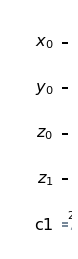

In [12]:
from qiskit import QuantumRegister

qc = QuantumCircuit(QuantumRegister(__, name='x'), QuantumRegister(__, name='y'), QuantumRegister(__, name='z'), ClassicalRegister(__))
qc.draw(output='mpl')

Now let's consider the four different possible inputs one by one:
1. When both x and y are zero, nothing needs to happen
2. If x is 1, then we need to flip z_0
3. If y is 1, then we need to flip z_0
4. If both x and y are 1, we need to flip z_1 and unflip z_0

Turns out, we only need one gate to cover each situation

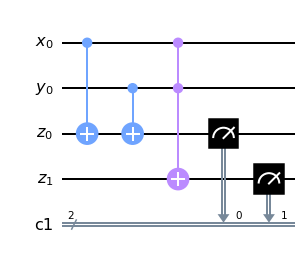

In [13]:
qc.cx(__) # if x is 1, flip z_0

qc.cx(___) #if y is 1, flip z_0

qc.ccx(___) #if both x and y are 1, flip z_1. z_0 will have already been flipped twice, so is back to zero

#finally, we measure z register (qubits 2 and 3) into the classical register
qc.measure([2,3], [0,1])
qc.draw(output='mpl')

Then, run and measure it and ...

In [14]:
results = execute(qc, backend=backend, shots=1000).result()
results.get_counts()

{'00': 1000}

All zeros! That's because x and y are both zero and so its working for the first case. To try the other cases we have to change x and y. We do that by inserting x gates at the very beginning of the circuit. To do so, the registers have to have all the same names so its easiest to copy the way we set up qc

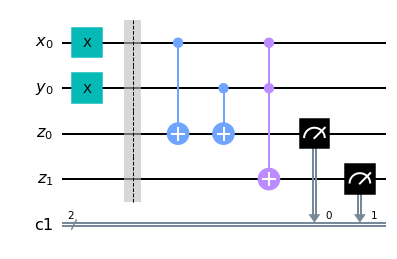

In [15]:
qc_add = QuantumCircuit(QuantumRegister(__, name='x'), QuantumRegister(__, name='y'), QuantumRegister(__, name='z'))

qc_add.x(0) #set x to 1 - comment/uncomment as needed
qc_add.x(1) #set y to 1 - comment/uncomment as needed
qc_add.barrier()

qc_add += ____

qc_add.draw(output='mpl')

Then we try again:

In [16]:
results = execute(qc_add, backend=backend, shots=1000).result()
results.get_counts()

{'10': 1000}

And it works! Change values of x and y to check for sure

## Exercises

1. Try to recreate the following 1 qubit states, each given as both bloch_sphere and qsphere. (remember to make a new circuit each time)

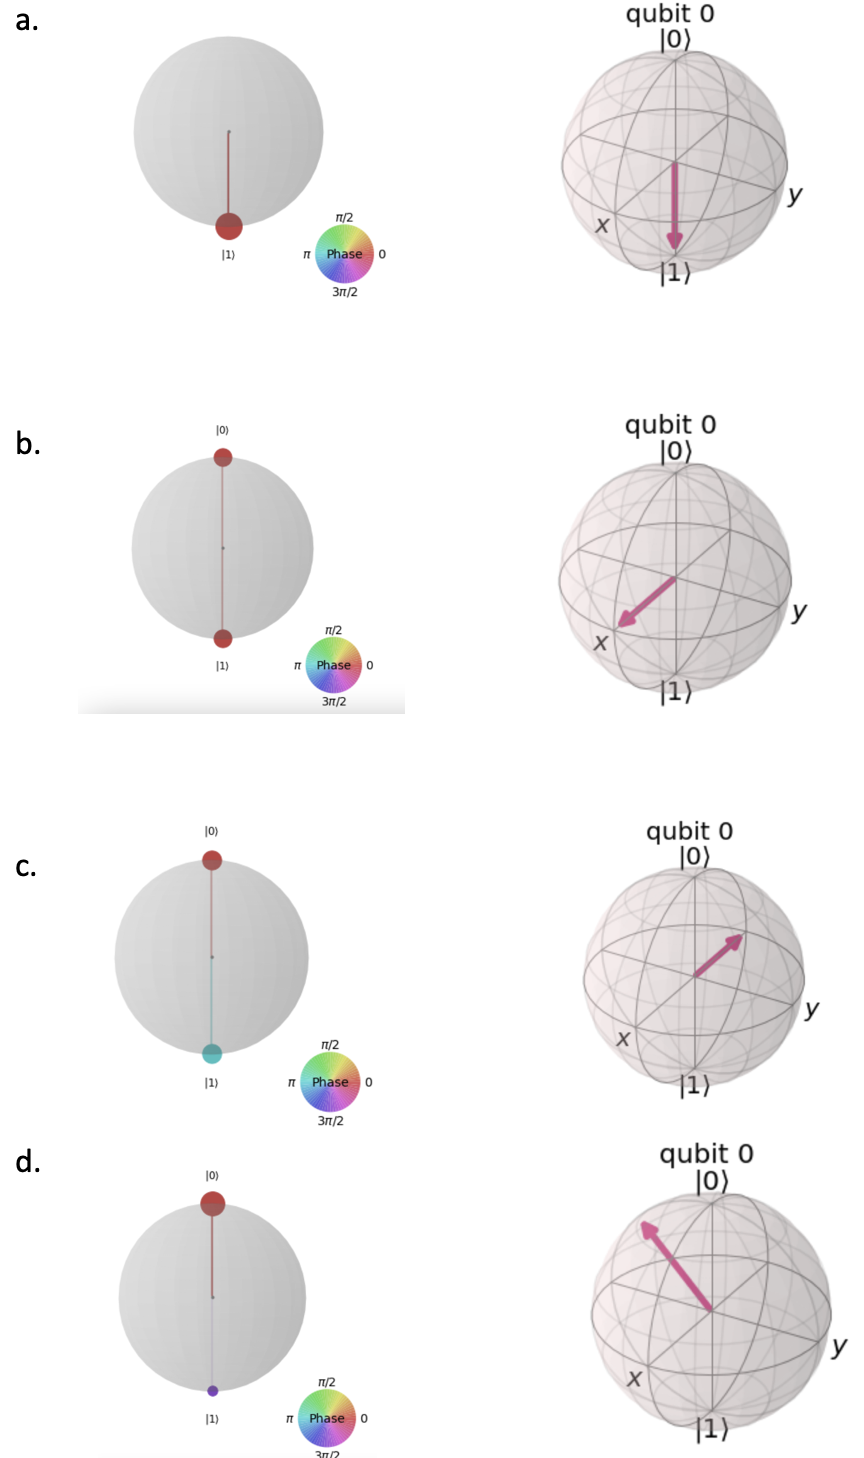

(hint: circuits a, b + d use only one gate)

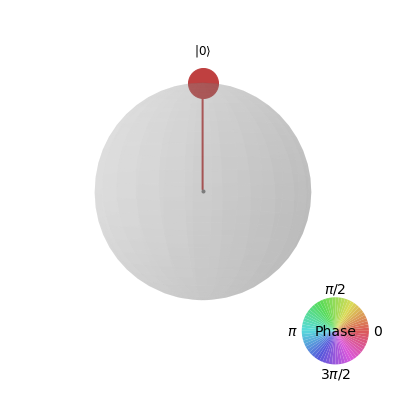

In [2]:
#part a
qc = QuantumCircuit(1)


## peform gate(s) here


state = Statevector.from_instruction(qc)
plot_state_qsphere(state) #choose which visualisation you prefer
#plot_bloch_multivector(state)

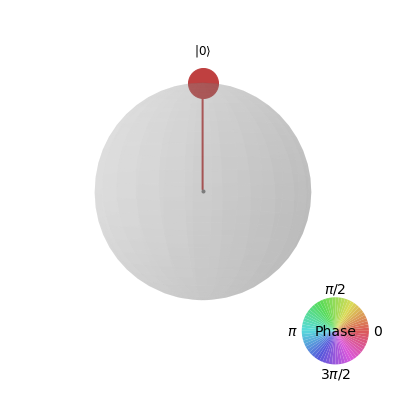

In [3]:
#part b
qc = QuantumCircuit(1)

## peform gate(s) here

state = Statevector.from_instruction(qc)
plot_state_qsphere(state) #choose which visualisation you prefer
#plot_bloch_multivector(state)

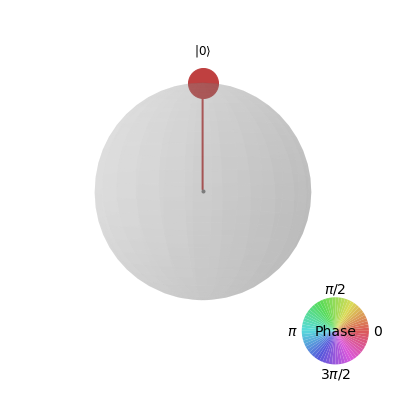

In [4]:
#part c
qc = QuantumCircuit(1)

## peform gate(s) here


state = Statevector.from_instruction(qc)
plot_state_qsphere(state) #choose which visualisation you prefer
#plot_bloch_multivector(state)

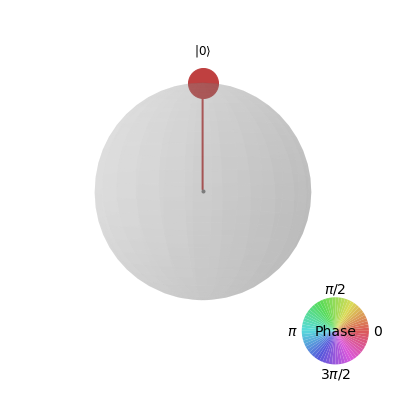

In [5]:
#part d
qc = QuantumCircuit(1)

## peform gate(s) here

state = Statevector.from_instruction(qc)
plot_state_qsphere(state) #choose which visualisation you prefer
#plot_bloch_multivector(state)

2. Match the following gates with their matrices

    1. Identity Gate
    2. X Gate
    3. Y Gate
    4. Z Gate
    5. H Gate

Matrices:

1. \begin{bmatrix} 0 & 1\\1 & 0 \end{bmatrix} <br>
1. \begin{bmatrix} 1 & 0\\0 & -1 \end{bmatrix} <br>
1. \begin{equation}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}\end{equation} <br>
1. \begin{bmatrix} 1 & 0\\0 & 1 \end{bmatrix} <br>
1. \begin{bmatrix} 0 & -i\\i & 0 \end{bmatrix} <br>